# Ridge, LASSO, Root-LASSO Regression

In [22]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from cvxpy import *
%matplotlib inline

## Simulating the AR model
simulate 2nd order AR model: <latex>$y_{k} = a_1y_{k-1}+a_2y_{k-2}+w_{k}$

In [243]:
def systemSimulation(N,a1,a2,noisePwr,signalPwr):
    '''
    @N: int, length of the sequence
    @a1: float, param 1
    @a2: float, param 2
    @noisePwr: float, power of noise
    w: AWGN noise
    '''
    y = np.zeros(N)
    y[0:2] = np.array([5,10])
    for i in range(N-2):
        y[i+2] = a1*y[i+1]+a2*y[i]+np.random.randn()*np.sqrt(noisePwr)
    return y

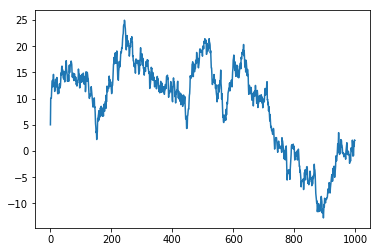

In [247]:
y = systemSimulation(1000,0.9,0.1,1,100)
plt.plot(y)

In [ ]:
## Classical Least Squa

In [248]:
def RidgeRegression(y,lambdaParam):
    '''
    @lambdaParam: float, parameter for Ridge penality
    '''
    phi = sc.linalg.toeplitz(y)
    phi = phi[0:2,1:-1]
    estimatedParam = np.linalg.inv(phi@phi.T+lambdaParam*np.eye(2))@phi@y[2:]
    return estimatedParam

In [249]:
for lambdaParam in range(10):
    RidgeEstimation = RidgeRegression(y,lambdaParam+1)
    print(RidgeEstimation)

[ 0.87227428  0.12435459]
[ 0.87157808  0.12504742]
[ 0.87088446  0.12573768]
[ 0.8701934   0.12642537]
[ 0.86950489  0.12711052]


In [250]:
def LassoRegression(y,lambdaParam):
    '''
    @lambdaParam: float, parameter for LASSO penality
    '''
    phi = sc.linalg.toeplitz(y)
    phi = phi[0:2,1:-1]
    LassoEstimation = Variable(2)
    objective = Minimize(sum_squares(y[2:] - phi.T@LassoEstimation)+lambdaParam*pnorm(LassoEstimation,1))
    prob = Problem(objective)
    result = prob.solve()
    return LassoEstimation.value

In [251]:
for lambdaParam in range(10):
    LassoEstimation = LassoRegression(y,lambdaParam+1)
    print(LassoEstimation)

[[ 0.87297137]
 [ 0.12365754]]
[[ 0.87296967]
 [ 0.1236559 ]]
[[ 0.87296798]
 [ 0.12365427]]
[[ 0.87296628]
 [ 0.12365264]]
[[ 0.87296462]
 [ 0.12365098]]
[[ 0.87296289]
 [ 0.12364937]]
[[ 0.87296115]
 [ 0.12364779]]
[[ 0.8729595 ]
 [ 0.12364611]]
[[ 0.87295777]
 [ 0.12364451]]
[[ 0.87295611]
 [ 0.12364284]]


In [252]:
def LeastSquareRegression(y):
    phi = sc.linalg.toeplitz(y)
    phi = phi[0:2,1:-1]
    estimatedParam = np.linalg.inv(phi@phi.T)@phi@y[2:]
    return estimatedParam

In [253]:
LSEstimation = LeastSquareRegression(y)
print(LSEstimation)

[ 0.87297306  0.12365917]


In [256]:
def RootLassoRegression(y,muParam):
    '''
    @muParam: float, parameter for Square Root LASSO penality
    '''
    phi = sc.linalg.toeplitz(y)
    phi = phi[0:2,1:-1]
    RootLassoEstimation = Variable(2)
    objective = Minimize(sum_squares(y[2:] - phi.T@RootLassoEstimation)+muParam*np.std(y)*pnorm(RootLassoEstimation,1))
    prob = Problem(objective)
    result = prob.solve()
    return RootLassoEstimation.value

In [257]:
for muParam in range(10):
    RootLassoEstimation = RootLassoRegression(y,muParam+1)
    print(RootLassoEstimation)

[[ 0.8729589 ]
 [ 0.12364554]]
[[ 0.8729447 ]
 [ 0.12363195]]
[[ 0.87293057]
 [ 0.12361829]]
[[ 0.87291639]
 [ 0.12360468]]
[[ 0.87290226]
 [ 0.12359102]]
[[ 0.87288812]
 [ 0.12357736]]
[[ 0.8728739]
 [ 0.1235638]]
[[ 0.87285978]
 [ 0.12355012]]
[[ 0.87284564]
 [ 0.12353647]]
[[ 0.87283144]
 [ 0.12352288]]
